# Task 1: Prediction using Supervised ML 
# Objective: Using Simple Linear Regression predict the percentage of an student based on the number of study hours.
# Created by: Ayushi Das
# GRIP@ The Spark Foundation

# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Loading Data

In [2]:
df=pd.read_csv("/content/student_scores - student_scores.csv")
df.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [ ]:
df.info

<bound method DataFrame.info of     Hours  Scores
0     2.5      21
1     5.1      47
2     3.2      27
3     8.5      75
4     3.5      30
5     1.5      20
6     9.2      88
7     5.5      60
8     8.3      81
9     2.7      25
10    7.7      85
11    5.9      62
12    4.5      41
13    3.3      42
14    1.1      17
15    8.9      95
16    2.5      30
17    1.9      24
18    6.1      67
19    7.4      69
20    2.7      30
21    4.8      54
22    3.8      35
23    6.9      76
24    7.8      86>

In [ ]:
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [ ]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


# Visualization of Dataset

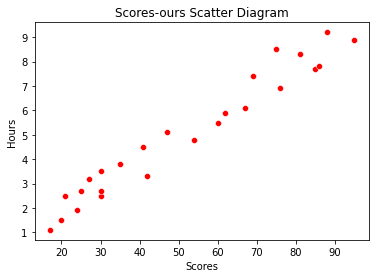

In [ ]:
plt.title("Scores-ours Scatter Diagram")
sns.scatterplot(x="Scores", y="Hours",data=df, color="red") 

In [ ]:
df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


Text(0.5, 1.0, 'Scares-Hours Regression line')

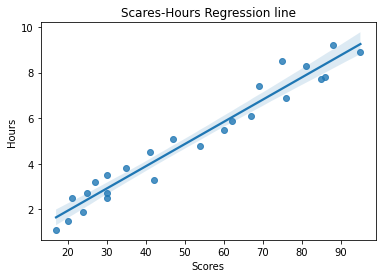

In [ ]:
sns.regplot(x="Scores", y="Hours",data=df)
plt.title("Scares-Hours Regression line")

In [7]:
x = df.drop('Scores',axis=1)
y=df["Scores"]
x

,Hours
0,2.5
1,5.1
2,3.2
3,8.5
4,3.5
5,1.5
6,9.2
7,5.5
8,8.3
9,2.7


# Splitting the dataset into the Training set and Test set

In [8]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=40)

# Training the Simple Linear Regression model on the Training set

In [13]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

# Predicting the Test set results

In [10]:
print(x_test)
y_pred= reg.predict(x_test)

    Hours
15    8.9
24    7.8
14    1.1
19    7.4
13    3.3
3     8.5
21    4.8
2     3.2


In [11]:
y_test

15    95
24    86
14    17
19    69
13    42
3     75
21    54
2     27
Name: Scores, dtype: int64

# Visualising the Training set results

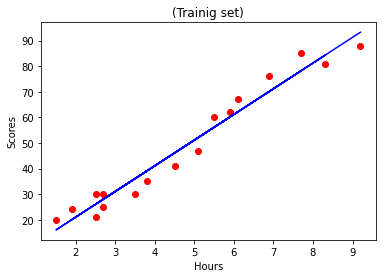

In [15]:
# Plotting the regression line
plt.scatter(x_train,y_train, color='red')
plt.plot(x_train,reg.predict(x_train),color='blue')
plt.title('(Trainig set)')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.show()

# Visualising the Test set results

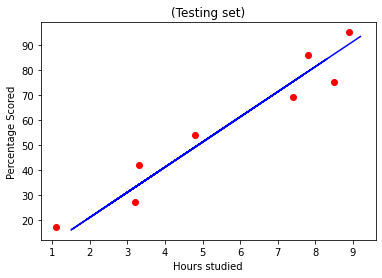

In [17]:
plt.scatter(x_test, y_test, color = 'red')
plt.plot(x_train, reg.predict(x_train), color = 'blue')
plt.title('(Testing set)')
plt.xlabel('Hours studied')
plt.ylabel('Percentage Scored')
plt.show()

In [ ]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
15,95,90.279155
24,86,79.236617
14,17,11.977522
19,69,75.221148
13,42,34.062598
3,75,86.263686
21,54,49.120604
2,27,33.058731


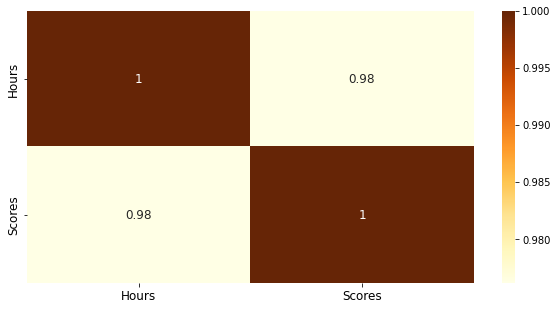

In [ ]:
# Checking the correlations
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(),annot=True,cmap="YlOrBr",annot_kws={'fontsize':12})
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

# Predicted score if a student studies for 9.25 hrs/ day?

In [ ]:
score = reg.score(x_test, y_test)
print(score)

0.930188764896189


# Checking accuracy of our model

In [19]:
print("Train : ",reg.score(x_train,y_train)*100)
print("Test : ",reg.score(x_test,y_test)*100)

Train :  96.23919141966742
Test :  93.01887648961889


# Finding mean absolute error, r^2 score error and Mean Squared Error

In [20]:
from sklearn import metrics  
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print('Mean absolute error:', metrics.mean_absolute_error(y_test, reg.predict(x_test))) 
print('r^2 score error:',r2_score(y_test, reg.predict(x_test)))
print('Mean squared error: ',mean_squared_error(y_test, reg.predict(x_test)))

Mean absolute error: 6.608383730582239
r^2 score error: 0.930188764896189
Mean squared error:  47.79342603239813


# Predicted score if a student studies for 9.25 hrs/ day?

In [21]:
x = 9.25
pred = reg.predict([[x]])
print("No of Hours = {}".format(x))
print("Predicted Score = {}".format(pred[0]))

No of Hours = 9.25
Predicted Score = 93.792689434365


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"
